## Student ID : 111522071 張凱東

In [11]:
#Import data preprocessing modules
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Machine learning module
import sklearn

import keras.models as k_models
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from sklearn import preprocessing
from tensorflow import keras

In [12]:
def data_preprocess(path_to_csv,is_train=0):    
    testdata = pd.read_csv(path_to_csv)
    
    testdata['Title'] = testdata['Name'].str.extract('([A-Za-z]+)\.', expand=False)

    title_mapping = {"Mr": 0,"Miss": 1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Mlle":3,"Major":3,"Col":3,"Countess":3,"Capt":3,"Ms":3,"Sir":3,"Lady":3,"Mme":3,"Don":3,"Dona":3,"Jonkheer":3}
    testdata['Title'] = testdata['Title'].map(title_mapping)
    testdata.drop('Name',axis=1,inplace=True)

    sex_mapping = {"male":0,"female":1}
    testdata['Sex'] = testdata['Sex'].map(sex_mapping)
    testdata["Age"].fillna(testdata.groupby("Title")["Age"].transform("median"), inplace = True)

    testdata.loc[testdata["Age"] <= 16,'Age'] = 0
    testdata.loc[(testdata["Age"] > 16) & (testdata["Age"] <= 26),'Age'] = 1
    testdata.loc[(testdata["Age"] > 26) & (testdata["Age"] <= 36),'Age'] = 2
    testdata.loc[(testdata["Age"] > 36) & (testdata["Age"] <= 62),'Age'] = 3
    testdata.loc[testdata["Age"] > 62,'Age'] = 4

    testdata["Embarked"] = testdata["Embarked"].fillna('S')
    e_mapping = {"S": 0,"C": 1,"Q": 2}
    testdata["Embarked"] = testdata["Embarked"].map(e_mapping)

    testdata["Fare"].fillna(testdata.groupby("Pclass")["Fare"].transform("median"), inplace = True)
    testdata.loc[testdata["Fare"] <= 17,'Fare'] = 0
    testdata.loc[(testdata["Fare"] > 17) & (testdata["Fare"] <= 30),'Fare'] = 1
    testdata.loc[(testdata["Fare"] > 30) & (testdata["Fare"] <= 100),'Fare'] = 2
    testdata.loc[testdata["Fare"] > 100 ,'Fare'] = 3

    testdata["Cabin"] = testdata["Cabin"].str[:1]
    c_mapping = {"A": 0,"B": 0.4,"C": 0.8,"D": 1.2,"E": 1.6,"F": 2,"G": 2.4,"T": 2.8}
    testdata["Cabin"] = testdata["Cabin"].map(c_mapping)
    testdata["Cabin"].fillna(testdata.groupby("Pclass")["Cabin"].transform("median"), inplace = True)
    testdata["FamilySize"] = testdata["SibSp"] + testdata["Parch"] + 1
    f_mapping = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}
    testdata["FamilySize"] = testdata["FamilySize"].map(f_mapping)

    testdata.drop(['Ticket','SibSp','Parch','PassengerId'],axis=1,inplace=True)

    if is_train == 1:
        y = testdata[['Survived']]
        testdata.drop(['Survived'],axis = 1,inplace = True)

        minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
        scaledFeatures=minmax_scale.fit_transform(testdata)
        
        return scaledFeatures,y
    
    if is_train == 0:

        minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
        scaledFeatures=minmax_scale.fit_transform(testdata)
        
        return scaledFeatures

In [13]:
def build_DNN_model():
    model = k_models.Sequential()
    model.add(Dense(input_dim=8,units=40,activation='LeakyReLU'))
    model.add(Dense(units= 100,activation='LeakyReLU'))
    model.add(Dense(units= 200,activation='LeakyReLU'))
    model.add(Dense(units= 1,activation='sigmoid'))
    model.summary()
    return model

def build_SVM_model():
    model = k_models.Sequential()
    model.add(Dense(input_dim=8,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units= 100))
    model.add(Activation('relu'))
    model.add(Dense(units= 10))
    model.add(Activation('relu'))
    model.add(Dense(units= 1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

def build_RandomForest_model():
    model = k_models.Sequential()
    model.add(Dense(input_dim=8,units=40))
    model.add(Activation('relu'))
    model.add(Dense(units= 100))
    model.add(Activation('relu'))
    model.add(Dense(units= 10))
    model.add(Activation('relu'))
    model.add(Dense(units= 1))
    model.add(Activation('sigmoid'))
    model.summary()
    return model

In [14]:
def fit_model(model,data_x,data_y):
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['acc'])
    train_history = model.fit(x=data_x,y=data_y,validation_split=0.2,batch_size=30,epochs=20)

    return train_history

In [15]:
def model_loss(model,data_x,data_y):
    #Evaluate training result
    score = model.evaluate(x=data_x,y=data_y)
    print('\nTrain Loss:',score[0])
    print ('\nTrain Acc:', score[1])

In [16]:
def show_train_history(train_history,train,validation,label):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [17]:
def make_csv(probability,path_to_file):
    submission = pd.DataFrame({
    "PassengerId": pd.read_csv(path_to_file)["PassengerId"],
    "Survived": probability
    })

    submission.to_csv('submission.csv', index=False)

### Training

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                360       
                                                                 
 dense_5 (Dense)             (None, 100)               4100      
                                                                 
 dense_6 (Dense)             (None, 200)               20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 24,861
Trainable params: 24,861
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
24/24 [==============================] - 1s 7ms/step - loss: 0.5540 - acc: 0.7303 - val_loss: 0.4317 - val_acc: 0.8045
Epoch 2/20
24/24 [==============================] - 

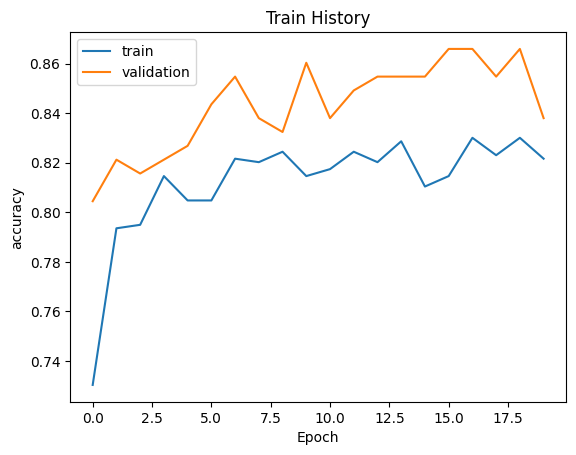

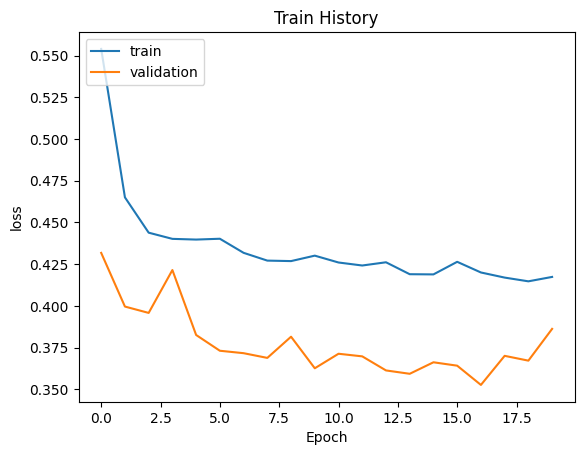

28/28 [==============================] - 0s 2ms/step - loss: 0.4151 - acc: 0.8272

Train Loss: 0.4150911271572113

Train Acc: 0.8271604776382446


In [18]:
#prepare data
path_to_file = 'input/titanic.csv'
train_x,train_y = data_preprocess(path_to_file,is_train=1)

#train model
DNN = build_DNN_model()
train_history = fit_model(DNN,data_x=train_x,data_y=train_y)

#Show Training Process
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

#get model score
model_loss(DNN,train_x,train_y)

### save model 

In [20]:
#Save the model
DNN.save('mymodel.h5')

### Predict

In [ ]:
#predict
path_to_file = "input/test.csv"
data_x = data_preprocess(path_to_file)

#make csv
pro = DNN.predict(data_x).flatten().round()
make_csv(pro,path_to_file)

14/14 [==============================] - 0s 981us/step
